In [1]:
import numpy as np
import pyspedas
import pytplot

In [5]:
download_trange = ['2017-04-14', '2017-04-15']

In [6]:
from pyspedas.erg import pwe_ofa
pwe_ofa(trange=download_trange)

15-Jun-23 17:52:27: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/pwe/ofa/l2/spec/2017/04/
15-Jun-23 17:52:27: Downloading https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/pwe/ofa/l2/spec/2017/04/erg_pwe_ofa_l2_spec_20170414_v02_03.cdf to erg_data/satellite/erg/pwe/ofa/l2/spec/2017/04/erg_pwe_ofa_l2_spec_20170414_v02_03.cdf
15-Jun-23 17:52:33: Download complete: erg_data/satellite/erg/pwe/ofa/l2/spec/2017/04/erg_pwe_ofa_l2_spec_20170414_v02_03.cdf


 
 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Plasma Wave Experiment (PWE) Onboard Frequency Analyzer (OFA) Level 2 spectrum data

Information about ERG PWE OFA

PI:  Yoshiya Kasahara
Affiliation: Kanazawa University

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of PWE/OFA: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Pwe/Ofa

Contact: erg_pwe_info at isee.nagoya-u.ac.jp
**************************************************************************


['erg_pwe_ofa_l2_spec_epoch_e132',
 'erg_pwe_ofa_l2_spec_E_spectra_132',
 'erg_pwe_ofa_l2_spec_quality_flag_e132',
 'erg_pwe_ofa_l2_spec_epoch_b132',
 'erg_pwe_ofa_l2_spec_B_spectra_132',
 'erg_pwe_ofa_l2_spec_quality_flag_b132']

In [18]:
tr = ['2017-04-14 05:05:00', '2017-04-14 05:25:00']

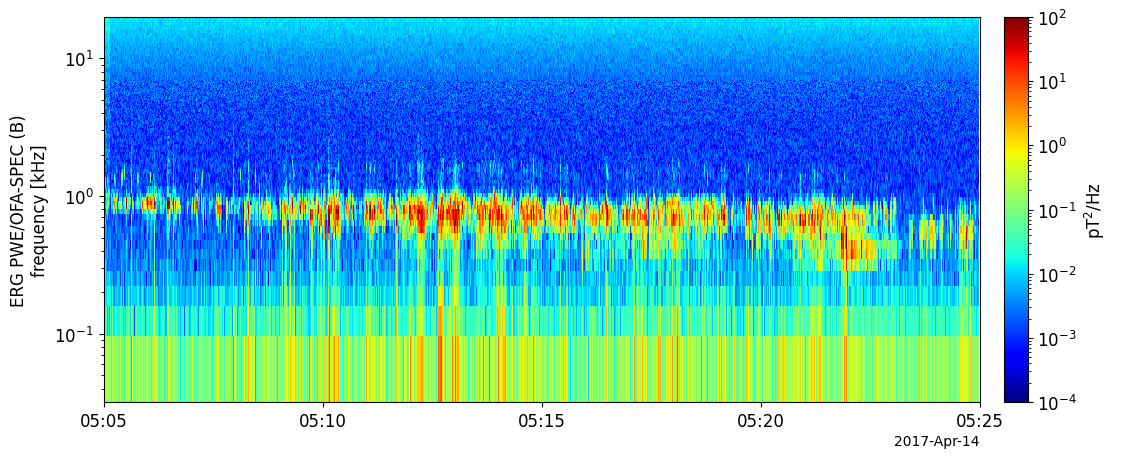

In [19]:
pytplot.xlim(tr[0], tr[1])
pytplot.tplot('erg_pwe_ofa_l2_spec_B_spectra_132')

In [20]:
min = 0.1
max = 2

In [21]:
data1 = pytplot.data_quants['erg_pwe_ofa_l2_spec_B_spectra_132']['spec_bins']

index_min = -1
for i, value in enumerate(data1):
    if value > min:
        index_min = i
        break

index_max = -1
for i, value in enumerate(data1):
    if value < max:
        index_max = i
    else:
        break

In [22]:

import datetime
# 元の時間配列
time_array = pytplot.data_quants['erg_pwe_ofa_l2_spec_B_spectra_132']['time']

# 指定された範囲
tr_start = datetime.datetime.strptime(tr[0], '%Y-%m-%d %H:%M:%S')
tr_end = datetime.datetime.strptime(tr[1], '%Y-%m-%d %H:%M:%S')
# 始まりのインデックスを取得
start_index = -1
import numpy as np
for i, timestamp in enumerate(time_array):
    if timestamp >= np.datetime64(tr_start):
        start_index = i
        break

# 終わりのインデックスを取得
end_index = -1
for i in range(len(time_array) - 1, -1, -1):
    timestamp = time_array[i]
    if timestamp <= np.datetime64(tr_end):
        end_index = i
        break

In [23]:
data = np.zeros(len(pytplot.get_data('erg_pwe_ofa_l2_spec_B_spectra_132')[0]))

for i in range(start_index, end_index+1):
    for j in range(index_min, index_max+1):
        data[i] += pytplot.data_quants['erg_pwe_ofa_l2_spec_B_spectra_132'][i][j]*pytplot.data_quants['erg_pwe_ofa_l2_spec_B_spectra_132']['spec_bins'][j]*1e3
import numpy as np
import pytplot
average_spin1 = 8
data_int1 = np.zeros(data.size)
for i in range(data.size):
    idx1 = np.arange(i-average_spin1//2, i+average_spin1//2+1).astype(int)
    idx1 = np.clip(idx1, 0, data.size-1)
    data_int1[i] = np.sum(data[idx1]) / average_spin1

pytplot.store_data('erg_pwe_ofa_l2_spec_B_chorus_integrate', data={'x': pytplot.data_quants['erg_pwe_ofa_l2_spec_B_spectra_132']['time'], 'y': data_int1})


True

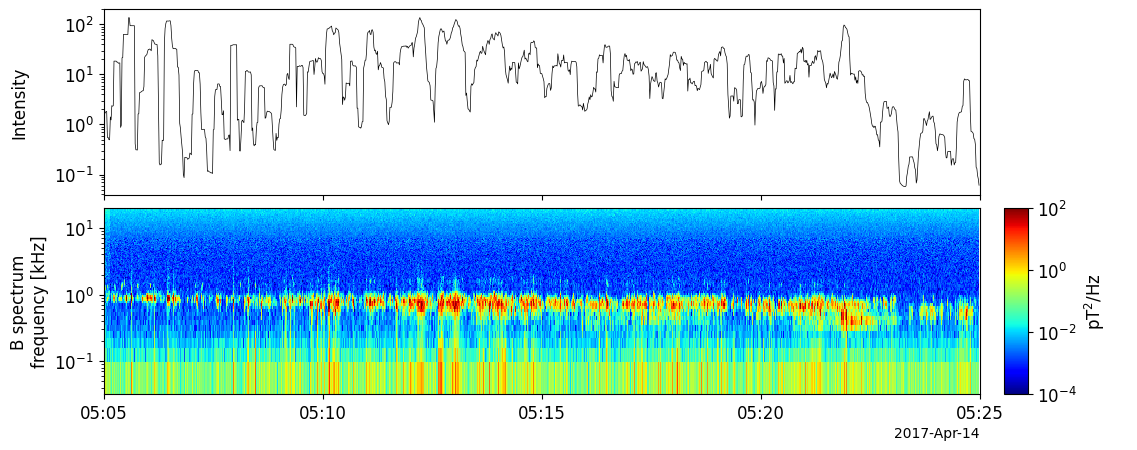

In [24]:
pytplot.options('erg_pwe_ofa_l2_spec_B_chorus_integrate', opt_dict={'ytitle': 'Intensity', 'ylog': True})
pytplot.options('erg_pwe_ofa_l2_spec_B_spectra_132', opt_dict={'ytitle': 'B spectrum'})
pytplot.tplot(['erg_pwe_ofa_l2_spec_B_chorus_integrate', 'erg_pwe_ofa_l2_spec_B_spectra_132'])

In [ ]:

def integral_chorus_spec(download_trange,r1, min, max):

    from pyspedas.erg import pwe_ofa
    pwe_ofa(trange=download_trange)

    import pytplot
    
    data1 = pytplot.data_quants['erg_pwe_ofa_l2_spec_B_spectra_132']['spec_bins']

    index_min = -1
    for i, value in enumerate(data1):
        if value > min:
            index_min = i
            break

    index_max = -1
    for i, value in enumerate(data1):
        if value < max:
            index_max = i
        else:
            break


    import datetime
    # 元の時間配列
    time_array = pytplot.data_quants['erg_pwe_ofa_l2_spec_B_spectra_132']['time']

    # 指定された範囲
    r1_start = datetime.datetime.strptime(r1[0], '%Y-%m-%d %H:%M:%S')
    r1_end = datetime.datetime.strptime(r1[1], '%Y-%m-%d %H:%M:%S')
    # 始まりのインデックスを取得
    start_index = -1
    import numpy as np
    for i, timestamp in enumerate(time_array):
        if timestamp >= np.datetime64(r1_start):
            start_index = i
            break

    # 終わりのインデックスを取得
    end_index = -1
    for i in range(len(time_array) - 1, -1, -1):
        timestamp = time_array[i]
        if timestamp <= np.datetime64(r1_end):
            end_index = i
            break

    data = np.zeros(len(pytplot.get_data('erg_pwe_ofa_l2_spec_B_spectra_132')[0]))

    for i in range(start_index, end_index+1):
        for j in range(index_min, index_max+1):
            data[i] += pytplot.data_quants['erg_pwe_ofa_l2_spec_B_spectra_132'][i][j]*pytplot.data_quants['erg_pwe_ofa_l2_spec_B_spectra_132']['spec_bins'][j]
    import numpy as np
    import pytplot
    average_spin1 = 8
    data_int1 = np.zeros(data.size)
    for i in range(data.size):
        idx1 = np.arange(i-average_spin1//2, i+average_spin1//2+1).astype(int)
        idx1 = np.clip(idx1, 0, data.size-1)
        data_int1[i] = np.sum(data[idx1]) / average_spin1

    pytplot.store_data('erg_pwe_ofa_l2_spec_B_chorus_integrate', data={'x': pytplot.data_quants['erg_pwe_ofa_l2_spec_B_spectra_132']['time'], 'y': data_int1})
